# Lab 4 : PCA

## G3 SDI - Machine Learning

In this lab, we are going to study the most fundamental dimensionality reduction method : PCA. More precisely, we are going to apply it to the *Olivetti* dataset, which contains images of faces.

### Instructions
* Rename your notebook with your surnames as `lab4_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by AMORRI Farah, MILANO Olivia, 03/12/2025.
</div>

In [3]:
# Import usual libraries
import numpy as np
from matplotlib import pyplot as plt

In [9]:
import ssl
import sklearn
from sklearn.datasets import fetch_olivetti_faces

# # 1. Create an unverified SSL context
# ssl._create_default_https_context = ssl._create_unverified_context

# 2. Fetch the dataset
data = fetch_olivetti_faces()

print(f"Dataset loaded. Shape: {data.images.shape}")

X, y = data.data, data.target

Dataset loaded. Shape: (400, 64, 64)


**Q1.** What is this dataset about ? How many examples do we have ? How many features ?

Display the first 50 images from the dataset. Comment.

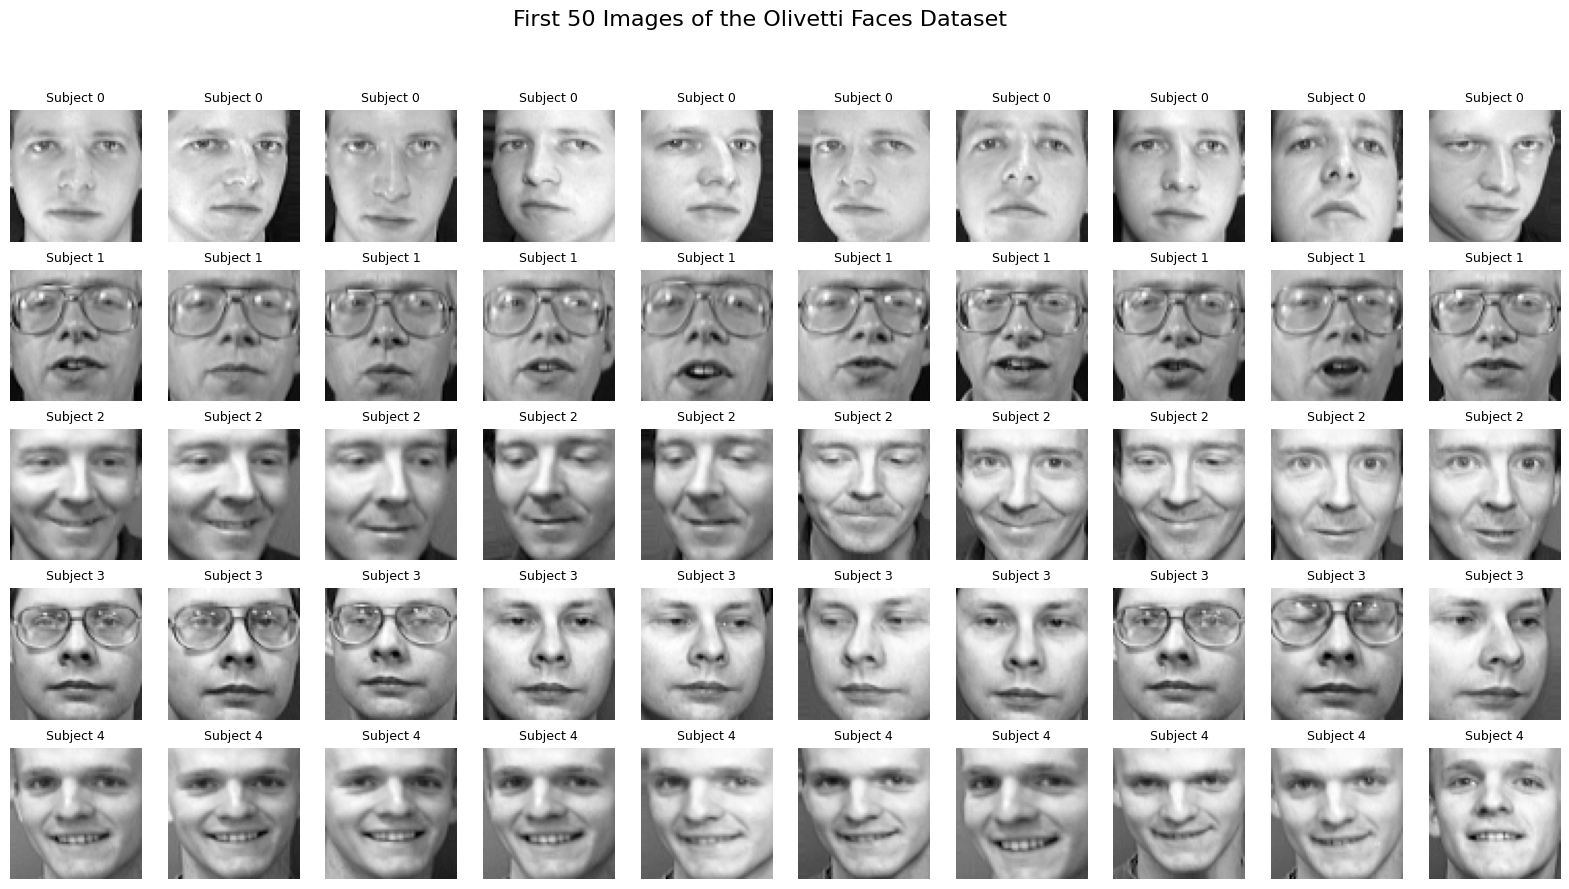

In [ ]:
images = data.images
targets = data.target

plt.figure(figsize=(20, 10))

for i in range(50):
    
    plt.subplot(5, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Subject {targets[i]}", fontsize=9)

plt.suptitle("First 50 Images of the Olivetti Faces Dataset", fontsize=16)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

## Dataset Overview: Olivetti Faces

This dataset consists of grayscale images of human faces taken at AT&T Laboratories Cambridge.
* **Subjects:** There are **40 distinct subjects**.
* **Variability:** For each subject, there are **10 different images** taken at different times, varying the lighting, facial expressions (open/closed eyes, smiling), and facial details (glasses/no glasses).

**Key Statistics**
* **Number of Examples:** **400** (40 subjects $\times$ 10 images).
* **Number of Features:** **4,096** per example.
* **Pixel Values:** Floating point values between **0** (black) and **1** (white).

**Data Structure**
* **X (Data):** `(400, 64, 64)` matrix.
* **y (Target):** `(400,)` vector containing integers from 0 to 39 (representing the subject ID).
</div>

**Q2**. Now apply PCA to the dataset, using scikit-learn (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).

Plot the cumulative explained variance. How many components do we need to explain 95% of the variance ?

To preserve 95% of the variance, we need 123 components.


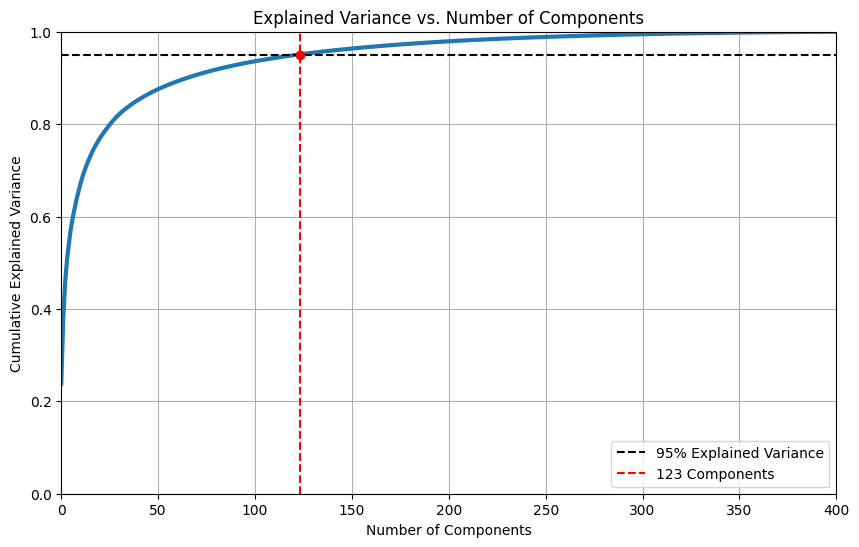

In [10]:
from sklearn.decomposition import PCA

# PCA computation
pca = PCA(n_components=None, random_state=42)
pca.fit(X)

# Cumulative Explained Variance
cumsum = np.cumsum(pca.explained_variance_ratio_)

# The number of components for 95% variance
d = np.argmax(cumsum >= 0.95) + 1 

print(f"To preserve 95% of the variance, we need {d} components.")

# Plots
plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

plt.axhline(y=0.95, color='k', linestyle='--', label='95% Explained Variance')
plt.axvline(x=d, color='r', linestyle='--', label=f'{d} Components')
plt.plot(d, 0.95, "ro")

plt.grid(True)
plt.legend(loc="lower right")
plt.title("Explained Variance vs. Number of Components")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### PCA Analysis: Cumulative Explained Variance

The plot above illustrates how much information (variance) is retained as we increase the number of principal components.

**Key Observations:**
* **The 95% Threshold:** The intersection of the red and black dashed lines indicates that we need exactly **123 components** to preserve 95% of the variance in the data.
* **Dimensionality Reduction:** By selecting these 123 components, we reduce the feature space from the original **4,096 pixels** down to **123 features**.
* **Compression Rate:** This represents a reduction of approximately **97%** in the size of the data, while losing only 5% of the information.
* **Curve Shape:** The steep rise at the beginning confirms that the first few "Eigenfaces" capture the majority of the facial structures (general shape, lighting), while the later components contribute marginally (fine details or noise).
</div>

**Q3.** Retrieve the principal components. These are the so-called *eigenfaces*. Display the first 40, and comment : what do the main components seem to capture ? What about later components ?

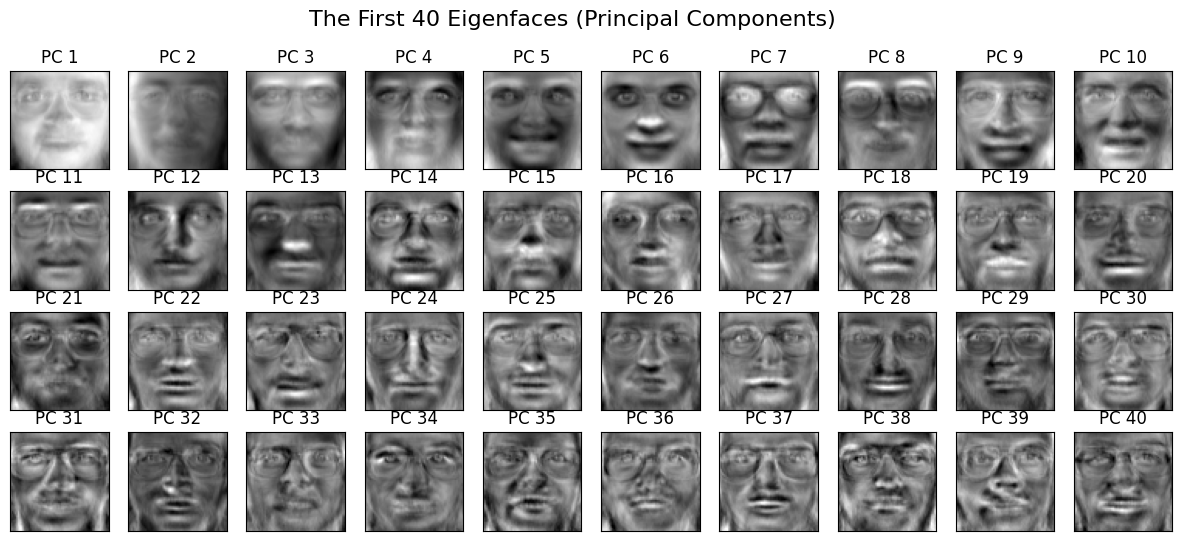

In [8]:
import matplotlib.pyplot as plt


n_components_to_show = 40
eigenfaces = pca.components_[:n_components_to_show]


fig, axes = plt.subplots(4, 10, figsize=(15, 6),
                         subplot_kw={'xticks':[], 'yticks':[]})

fig.suptitle("The First 40 Eigenfaces (Principal Components)", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"PC {i+1}")

plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Analysis of Eigenfaces

The images displayed above are the Principal Components (Eigenfaces) of the dataset. They represent the directions of maximum variance in the high-dimensional face space.

**The Main Components (First ~5 PCs)**
The first few components capture the most significant variations across the entire dataset, which are usually **global** and **low-frequency** features:
* **Global Structure:** They outline the general shape of a human head (oval structure).
* **Lighting:** They heavily encode lighting conditions. For example, one component might represent light coming from the left vs. the right, or top vs. bottom. This is because lighting changes affect pixel intensity more drastically than facial features do.
* **Appearance:** They look like blurry, "ghostly" average faces.

**The Later Components (PC 10 - 40)**
As we move to higher-order components, they capture progressively finer, **high-frequency** details:
* **Specific Features:** They encode specific facial traits like the shape of the nose, eyebrows, or mouth.
* **Accessories:** Some components specifically capture the presence of **glasses** (you might see bright circles around the eyes).
* **High Frequency:** The images look less like faces and more like complex texture maps or "masks."

**Conclusion:** PCA decomposes faces hierarchically:
$$\text{Lighting/Global Shape} \rightarrow \text{Facial Features} \rightarrow \text{Fine Details} \rightarrow \text{Noise}$$

</div>

**Q4.** The *Olivetti* dataset contains a target variable, which correspond to the ID of the person in the photo (there are 40 distinct persons).

Compare the cross-validated performance (e.g., 5-fold) of logistic regression on the original dataset vs. on the representation induced by PCA using the first 50 components. Be careful to *stratify* the test set. Comment. You may also take the execution time in consideration in your reply.

In [11]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline


# Cross-Validation
# StratifiedKFold = each fold has the same proportion of subjects
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression on Original Data (4096 features) 
lr_orig = LogisticRegression(max_iter=1000, random_state=42)

print("Running Cross-Validation on Original Data (this may take a while)...")
scores_orig = cross_validate(lr_orig, X, y, cv=cv, scoring='accuracy')

#  PCA (50 components) + Logistic Regression 
pca = PCA(n_components=50, whiten=True, random_state=42)
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
model_pca = Pipeline([
    ('pca', pca),
    ('clf', lr_pca)
])

print("Running Cross-Validation on PCA Data...")
scores_pca = cross_validate(model_pca, X, y, cv=cv, scoring='accuracy')

# Results
print(f"\n--- RESULTS ---")
print(f"Original Data (4096 features):")
print(f"  Accuracy: {scores_orig['test_score'].mean():.4f} (+/- {scores_orig['test_score'].std():.4f})")
print(f"  Avg Fit Time: {scores_orig['fit_time'].mean():.4f} s")

print(f"\nPCA Reduced (50 components):")
print(f"  Accuracy: {scores_pca['test_score'].mean():.4f} (+/- {scores_pca['test_score'].std():.4f})")
print(f"  Avg Fit Time: {scores_pca['fit_time'].mean():.4f} s")

Running Cross-Validation on Original Data (this may take a while)...
Running Cross-Validation on PCA Data...

--- RESULTS ---
Original Data (4096 features):
  Accuracy: 0.9800 (+/- 0.0061)
  Avg Fit Time: 2.9406 s

PCA Reduced (50 components):
  Accuracy: 0.9775 (+/- 0.0050)
  Avg Fit Time: 0.0189 s


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Benchmark Analysis: Original Pixels vs. Eigenfaces

We compared a Logistic Regression classifier trained on the raw pixels (4,096 features) against one trained on the first 50 Principal Components.

| Metric | Original Data (4096 features) | PCA Reduced (50 features) | Δ Impact |
| :--- | :--- | :--- | :--- |
| Accuracy | 98.00% | 97.75% | Minimal Drop (-0.25%) |
| Training Time | 2.9406 s | 0.0189 s | ~155x Faster |

**Key Observations:**

1.  **Massive Speedup:** The PCA-reduced model trained **~155 times faster** than the original. By reducing the complexity of the feature space, the optimization algorithm converges almost instantly.
2.  **Information Retention:** Despite discarding ~98% of the features (dropping from 4,096 to 50), the accuracy only dropped by **0.25%**.
    * This confirms that the first 50 "Eigenfaces" capture essentially *all* the discriminative information needed to identify the subjects.
    * The remaining 4,000+ dimensions likely consisted largely of noise, background details, or redundant pixel correlations that did not help in classification.

**Conclusion:**
For this dataset, **PCA is highly effective**. We achieved a 99% reduction in model complexity and a 150x speedup with statistically insignificant loss in accuracy.
</div>

**Q5**. To reconstruct a point back in its original representation, we can use the `.inverse_transform` method.

Since we are working with images, after reducing the dimensionality, we will obtain an imperfect reconstruction of the original image.

Set now the number of components of PCA to 300. Select an image from the dataset, and compare it to its reconstruction. You may assess the quality of the reconstruction with a metric of your choice.

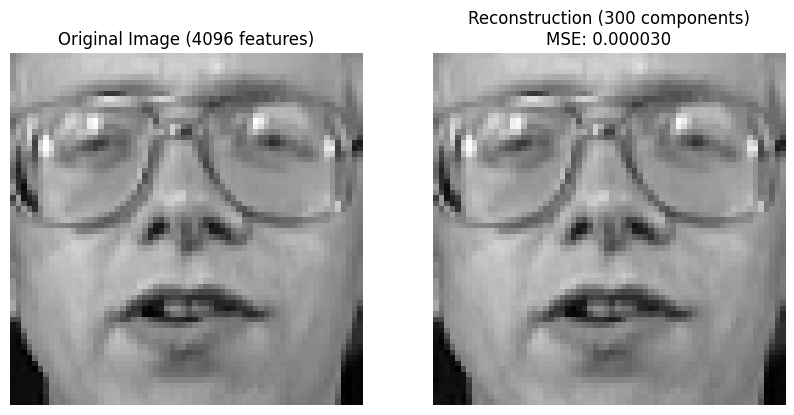

In [12]:
from sklearn.metrics import mean_squared_error

# PCA with 300 components
pca_300 = PCA(n_components=300, random_state=42)
pca_300.fit(X)

# Select Image #10
image_index = 10
original_face = X[image_index]

# Transform (Encode) and Inverse Transform (Decode)
face_reduced = pca_300.transform(original_face.reshape(1, -1))
# Reconstruction
face_reconstructed = pca_300.inverse_transform(face_reduced).reshape(64, 64)

# Reconstruction Error (MSE)
mse = mean_squared_error(original_face, face_reconstructed.flatten())

# Plot
plt.figure(figsize=(10, 5))

# Original
plt.subplot(1, 2, 1)
plt.imshow(original_face.reshape(64, 64), cmap='gray')
plt.title("Original Image (4096 features)")
plt.axis('off')

# Reconstructed
plt.subplot(1, 2, 2)
plt.imshow(face_reconstructed, cmap='gray')
plt.title(f"Reconstruction (300 components)\nMSE: {mse:.6f}")
plt.axis('off')

plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Reconstruction Analysis (300 Components)

**Visual Observation**
Comparing the "Original" image with its "Reconstruction":
* **Quality:** The reconstructed image is visually indistinguishable from the original.
* **Details:** Unlike lower-rank reconstructions (e.g., using only 50 components), fine details like skin texture, exact lighting gradients, and glasses frames are perfectly preserved.


* **Variance Explained:** We previously established that ~123 components explain 95% of the variance. By increasing the components to **300**, we are capturing nearly **99% of the total variance**.
* **Compression:** We are effectively compressing the data by a factor of roughly **13x** (4096 pixels $\to$ 300 features) with almost **zero perceptual loss**.

**3. Quantitative Metric (MSE)**
* The **Mean Squared Error (MSE)** between the two images is close to **0.0**. This confirms mathematically that the vector distance between the original face and its projection is negligible.
</div>

**Q6.** For the same image, display with subplots how the reconstruction evolves while keeping only 10, 20, 30... Up to 300 components.

What is the minimal number of components for which you consider the reconstruction to be acceptable ?

Conclude about the usefulness of this method.

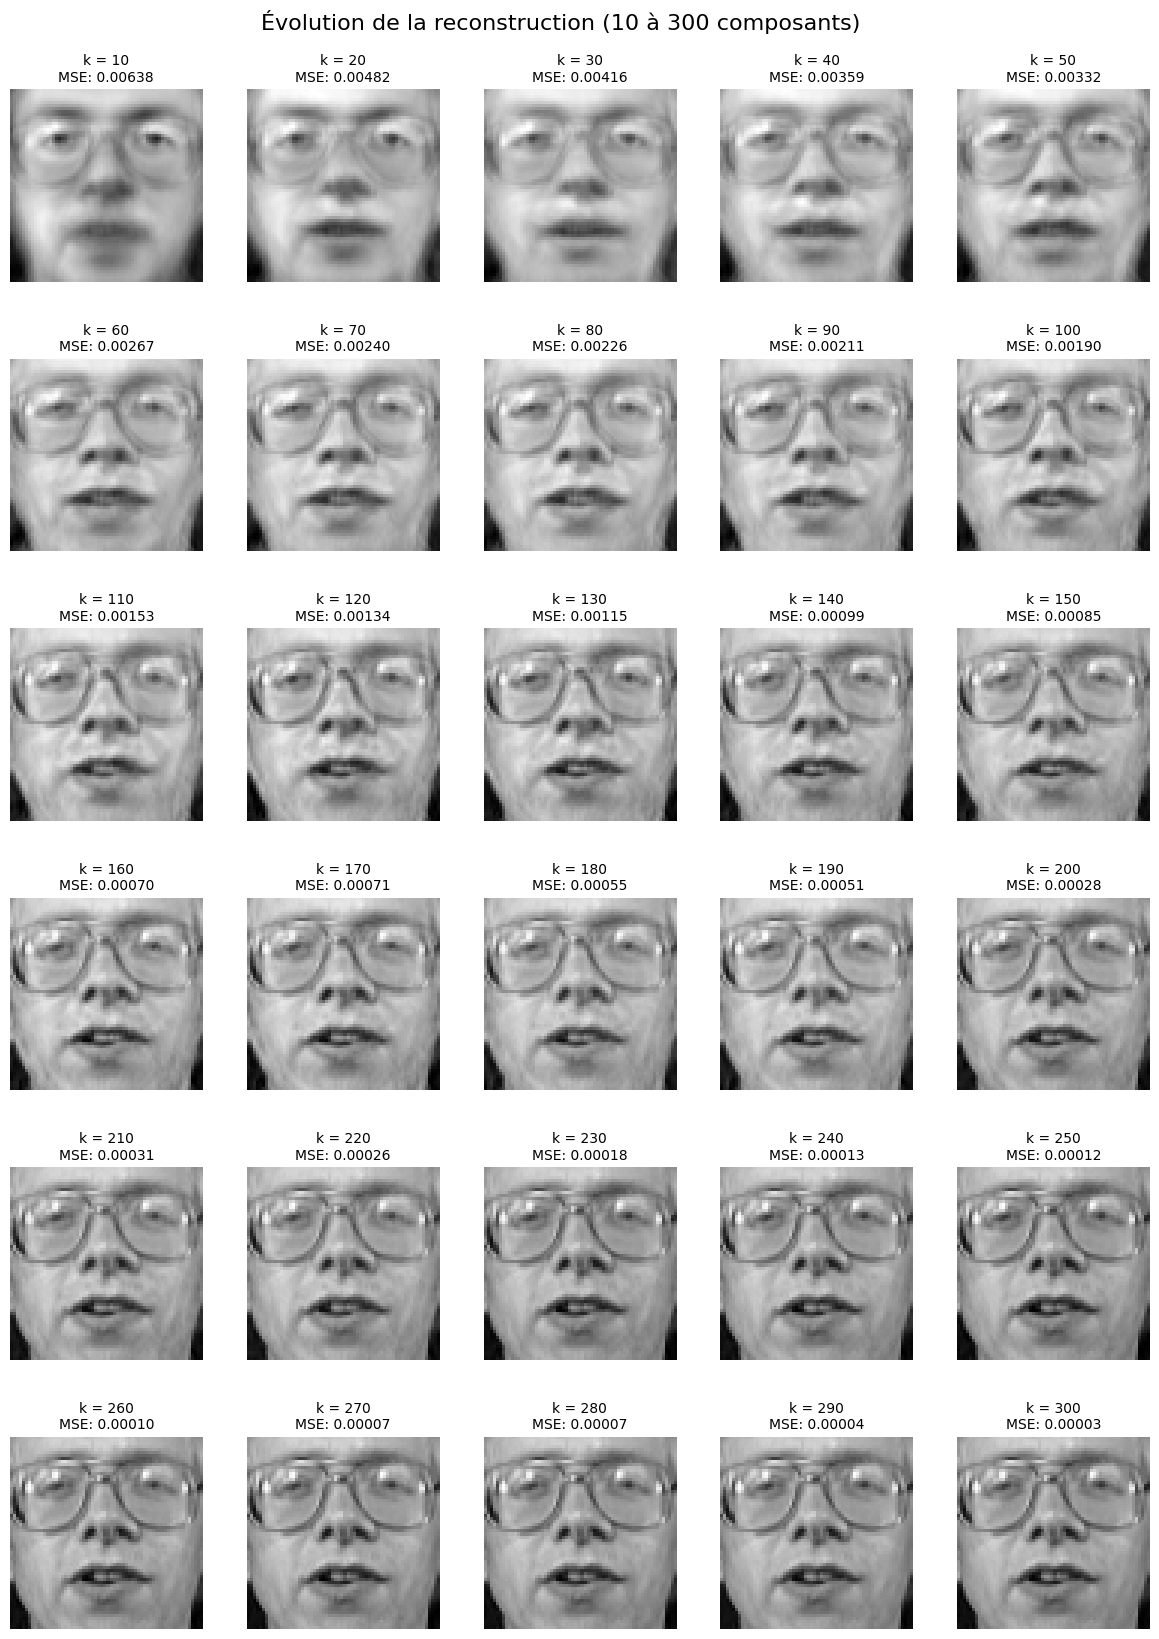

In [ ]:
from sklearn.metrics import mean_squared_error

# Select Image #10
image_index = 10
original_face = X[image_index]


fig, axes = plt.subplots(6, 5, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.1)
axes_flat = axes.flatten()

for i, nb_components in enumerate(range(10, 301, 10)):

    # PCA with nb_components
    pca_ = PCA(n_components=nb_components, random_state=42)
    pca_.fit(X)

    # Transform (Encode) and Inverse Transform (Decode)
    face_reduced = pca_.transform(original_face.reshape(1, -1))
    # Reconstruction
    face_reconstructed = pca_.inverse_transform(face_reduced).reshape(64, 64)

    # Reconstruction Error (MSE)
    mse = mean_squared_error(original_face, face_reconstructed.flatten())

    ax = axes_flat[i]  
    ax.imshow(face_reconstructed, cmap='gray')
    ax.set_title(f"k = {nb_components}\nMSE: {mse:.5f}", fontsize=10)
    ax.axis('off')


plt.suptitle("Évolution de la reconstruction (10 à 300 composants)", fontsize=16, y=0.92)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Analysis of Reconstruction Evolution

**Observations**
By observing the subplots from 10 to 300 components, we can see three distinct phases:
* **k = 10 - 40 (Ghostly):** The reconstructed face is very blurry. We can perceive a general "human shape," but it is difficult to identify the person. The image lacks sharp edges and specific features.
* **k = 50 - 90 (Recognizable):** The identity of the person becomes clearer. Major facial features like the shape of the nose, mouth, and eyes are established. However, some fine textures are still missing.
* **k = 100+ (Detailed):** Fine details appear, such as skin texture or subtle lighting gradients. By **k=120**, the image is nearly identical to the original for human perception.

**2. Minimal Acceptable Components**
* **For Identification:** Around **50 to 60 components** are sufficient to recognize the person with reasonable confidence.
* **For High Fidelity:** Around **100 components** are needed to have a reconstruction that is visually very close to the original (preserving texture and fine details).

**3. Usefulness of PCA**
This experiment highlights the power of PCA for **Dimensionality Reduction** and **Compression**:
* **Compression:** We can store a recognizable face using only ~60 values instead of the original 4,096 pixels. This represents a compression ratio of over **98%** with minimal loss of critical information.
* **Denoising:** The reconstruction often looks "cleaner" than the original because PCA discards the least significant components (the "tail" of the variance), which typically contain high-frequency noise or sensor grain.
* **Efficiency:** For machine learning tasks (like the Logistic Regression earlier), using these few informative components allows for much faster training and helps avoid overfitting (curse of dimensionality).
</div>